In [2]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


In [ ]:
!unzip -d . data.zip

Archive:  data.zip
   creating: ./data/
  inflating: ./data/╕╜╝■1.csv  
  inflating: ./data/╕╜╝■2.csv  
  inflating: ./data/╕╜╝■3.xlsx  
  inflating: ./data/╕╜╝■4.xlsx  
  inflating: ./data/╕╜╝■5.xlsx  


In [3]:
!git clone https://github.com/liuyunhaozz/Ml-learning.git

Cloning into 'Ml-learning'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 66 (delta 13), reused 58 (delta 8), pack-reused 0
Unpacking objects: 100% (66/66), done.


In [15]:
!cd Ml-learning && git pull

remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5 (delta 2), reused 5 (delta 2), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/liuyunhaozz/Ml-learning
   6c12441..c7fb0a7  master     -> origin/master
Updating 6c12441..c7fb0a7
Fast-forward
 shop/data/data.csv | 764 +++++++++++++++++++++++++++++++++++++++++++++++++++++
 1 file changed, 764 insertions(+)
 create mode 100644 shop/data/data.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
data_1 = pd.read_csv('./Ml-learning/shop/data/salerecord_1.csv')
data_2 = pd.read_csv('./Ml-learning/shop/data/salerecord_2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data_1

,create_dt,order_id,sku_id,sku_name,is_finished,sku_cnt,sku_prc,sku_sale_prc,sku_cost_prc,upc_code
0,12/4/2018,1.000010e+14,2005932936,NaN,1,1,39.8,39.8,0.0,6.9482E+12
1,11/30/2016,6.288980e+14,2005508919,NaN,1,1,8.8,8.8,0.0,2.4E+12
2,11/30/2016,6.288980e+14,2004962651,NaN,1,1,7.5,7.5,0.0,6.90799E+12
3,11/30/2016,6.288980e+14,2005468766,NaN,1,1,5.0,5.0,0.0,6.9417E+12
4,11/30/2016,6.289280e+14,2003138337,NaN,1,2,9.8,9.8,0.0,6.90879E+12
...,...,...,...,...,...,...,...,...,...,...
611195,7/21/2017,7.174520e+14,2007654375,NaN,0,1,6.0,2.0,2.0,6.92584e+12
611196,7/21/2017,7.174520e+14,2003117675,NaN,0,1,5.8,5.8,0.0,6.90799e+12
611197,7/21/2017,7.174520e+14,2003118168,NaN,0,1,5.8,5.8,0.0,6.90799e+12
611198,7/21/2017,7.174520e+14,2003117830,NaN,0,1,13.5,13.5,0.0,6.9482e+12


In [ ]:
data_2

In [7]:
print(type(data_1['is_finished'][0]))

<class 'numpy.int64'>


In [8]:
type(data_1['is_finished'][0])

numpy.int64

In [9]:
# test for method iterrows()
for index, row in data_1.iterrows():
    print(index) # 输出每行的索引值
    print('\n' * 3)
    print(type(row))
    break

0




<class 'pandas.core.series.Series'>


In [ ]:
# 检查是否有购买数量为负值的商品(退货情况)
for index, row in data_1.iterrows():
  if row['sku_cnt'] < 0:
    print(index)

In [10]:
date = {}
for index, row in data_1.iterrows():
  # data clean
  if not row['is_finished']:
    continue
  if row['sku_cnt'] < 0:
    row['sku_cnt'] *= -1
  if row['create_dt'] not in date.keys():
    date[row['create_dt']] = [row.to_dict()]
  else:
    date[row['create_dt']].append(row.to_dict())

for index, row in data_2.iterrows():
  # data clean
  if not row['is_finished']:
    continue
  if row['sku_cnt'] < 0:
    row['sku_cnt'] *= -1
  if row['create_dt'] not in date.keys():
    date[row['create_dt']] = [row.to_dict()]
  else:
    date[row['create_dt']].append(row.to_dict())

In [11]:
print(len(date.keys()))

763


In [ ]:
# test for date
for key, value in date.items():
  print(key)
  print(len(value))
  break

12/4/2018
2519


In [ ]:
# example
my_dict = {'i': 1, 'love': 2, 'you': 3}
my_list = [my_dict]
my_df = pd.DataFrame(my_list)
 
print(my_df)

   i  love  you
0  1     2    3


In [12]:
sheet = []
for key, value in date.items():
  sale = 0.0 # 总营业额
  cost_1 = 0.0 # 总成本(r = 0.25)
  cost_2 = 0.0 # 总成本(r = 0.3)
  cost_3 = 0.0 # 总成本(r = 0.35)
  prc = 0.0  # 总原价
  for dic in value:
    sale += dic['sku_sale_prc'] * dic['sku_cnt']
    prc += dic['sku_prc'] * dic['sku_cnt']
    if not dic['sku_cost_prc']:
      cost_1 += dic['sku_prc'] / (1 + 0.25) * dic['sku_cnt']
      cost_2 += dic['sku_prc'] / (1 + 0.3) * dic['sku_cnt']
      cost_3 += dic['sku_prc'] / (1 + 0.35) * dic['sku_cnt']
    else:
      cost_1 += dic['sku_cost_prc'] * dic['sku_cnt']
      cost_2 += dic['sku_cost_prc'] * dic['sku_cnt']
      cost_3 += dic['sku_cost_prc'] * dic['sku_cnt']
  sheet.append(dict(day=key, cost_1=cost_1, cost_2=cost_2, cost_3=cost_3, prc=prc, sale=sale,
                    profit_1=(sale - cost_1)/cost_1, profit_2=(sale - cost_2)/cost_2,
                    profit_3=(sale - cost_3)/cost_3, discont=(prc - sale)/prc))

In [13]:
len(sheet)

763

In [14]:
sheet = pd.DataFrame(sheet)
sheet.to_csv("data.csv",index=False)

In [ ]:
!rm data.csv

In [16]:
data = pd.read_csv('./Ml-learning/shop/data/data.csv')

In [17]:
data

,day,cost_1,cost_2,cost_3,prc,sale,profit_1,profit_2,profit_3,discont
0,12/4/2018,37368.636,36574.324615,35838.851111,48587.48,42459.46,0.136233,0.160909,0.184733,0.126123
1,11/30/2016,2575.040,2535.246154,2498.400000,3306.30,2833.70,0.100449,0.117722,0.134206,0.142939
2,12/2/2016,2051.440,2003.984615,1960.044444,2616.50,2359.90,0.150363,0.177604,0.204003,0.098070
3,12/3/2016,2875.520,2814.769231,2758.518519,3692.60,3270.40,0.137325,0.161871,0.185564,0.114337
4,12/4/2016,3420.264,3349.276923,3283.548148,4319.18,3881.68,0.134907,0.158961,0.182160,0.101292
...,...,...,...,...,...,...,...,...,...,...
758,12/29/2018,53272.844,52164.706154,51138.652593,68383.44,60221.94,0.130443,0.154458,0.177621,0.119349
759,12/30/2018,132825.200,129981.827692,127349.075556,172531.12,150241.92,0.131125,0.155869,0.179765,0.129189
760,12/31/2018,121146.408,118386.335385,115830.712593,157399.35,138330.88,0.141849,0.168470,0.194250,0.121147
761,1/1/2019,57609.468,56397.570769,55275.443704,73715.48,65080.00,0.129675,0.153950,0.177376,0.117146


In [40]:
discount = data['discont'].values
sale = data['sale'].values

In [22]:
len(discount), len(sale)

(763, 763)

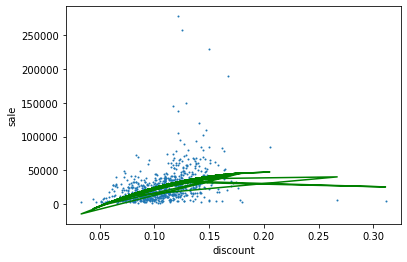

In [29]:
plt.scatter(discount, sale, s=1)
plt.xlabel('discount')
plt.ylabel('sale')

# 二次拟合
coef = np.polyfit(discount, sale, 2)
sale_fit = np.polyval(coef, discount)
plt.plot(discount, sale_fit, 'g')
plt.show()

In [30]:
for i, value in enumerate(discount):
  if value > 0.2:
    print(i)

31
61
496


In [42]:
lst = [31, 61, 496]
discount = np.delete(discount, lst)
sale = np.delete(sale, lst)

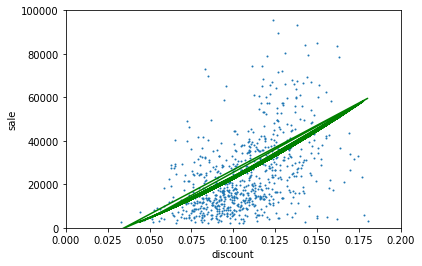

In [43]:
plt.xlim(0, 0.2)
plt.ylim(0, 100000)
plt.scatter(discount, sale, s=1)
plt.xlabel('discount')
plt.ylabel('sale')

# 二次拟合
coef = np.polyfit(discount, sale, 2)
sale_fit = np.polyval(coef, discount)
plt.plot(discount, sale_fit, 'g')
plt.show()

In [44]:
from sklearn import linear_model


from sklearn.linear_model import LinearRegression #导入线性回归模型

from sklearn.preprocessing import PolynomialFeatures # 导入多项式回归模型

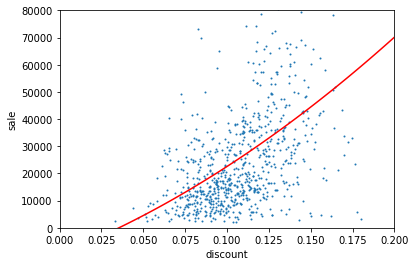

In [52]:
plt.xlim(0, 0.2)
plt.ylim(0, 80000)
plt.scatter(discount, sale, s=1)
plt.xlabel('discount')
plt.ylabel('sale')

quadratic_featurizer=PolynomialFeatures(degree=2)

# 用二次多项式对样本X值做变换
discount = discount.reshape(-1, 1)

X_train_quadratic = quadratic_featurizer.fit_transform(discount)

# 创建一个线性回归实例

regressor_model=linear_model.LinearRegression()

# 以多项式变换后的x值为输入，带入线性回归模型做训练

regressor_model.fit(X_train_quadratic,sale)

# 设计x轴一系列点作为画图的x点集

xx=np.linspace(0,0.2,100)

# 把训练好X值的多项式特征实例应用到一系列点上,形成矩阵

xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))

yy_predict = regressor_model.predict(xx_quadratic)

# 用训练好的模型作图

plt.plot(xx, yy_predict, 'r-')

# X_test_quadratic = quadratic_featurizer.transform(X_test)

# print('二次回归 r-squared', regressor_model.score(X_test_quadratic, y_test))

plt.show() # 展示图像